# Seeing if I have collected the mornings Stock Data
### Results

|Stat|5min|10min|15min|30min|45min|60min|240min|
|---|---|---|---|---|---|---|---|
count| 56227|56220|56509|56784|56529|56633|56345|
mean|0.000082|0.000046|0.000067|0.000137|0.000105|0.000166|0.000169|
std|0.004644|0.005968|0.006683|0.008043|0.008961|0.009557|0.012181|
min|-0.071692|-0.069543|-0.090744|-0.113384|-0.163498|-0.165475|-0.129851|
25%|-0.002077|-0.002675|-0.002975|-0.003487|-0.003974|-0.004219|-0.005343|
50%|0.000000|0.000000|0.000000|0.000038|0.000000|0.000067|0.000144|
75%|0.002215|0.002739|0.003116|0.003743|0.004150|0.004460|0.005660|
max|0.048811|0.077024|0.091716|0.099208|0.107307|0.165746|0.143280|

## 30 minutes after opening

In [2]:
import duckdb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

import pandas as pd
import duckdb

# Connect to the database
con = duckdb.connect(r"C:\Users\rybot\OneDrive\Databases\datadump.duckdb")

# Query to fetch close prices at 9:00 and 9:05 for each ticker
query = f'''
    SELECT STRFTIME('%Y-%m-%d', Datetime) AS Date, Stock, STRFTIME('%H:%M:%S', Datetime) AS Time, close
    FROM Stocks
    WHERE (STRFTIME('%H:%M:%S', Datetime) = '09:30:00' OR STRFTIME('%H:%M:%S', Datetime) = '10:00:00') 
    AND Interval = 1
'''

# Fetch the data
df = con.execute(query).fetchdf()

# Pivot the data to have closing prices for each time in separate columns
df_pivot = df.pivot_table(index=['Date', 'Stock'], columns='Time', values='close').reset_index()
df_pivot.columns = ['Date', 'Ticker', 'Close_09_00', 'Close_09_05']

# Calculate the difference and percent change
df_pivot['Difference'] = df_pivot['Close_09_05'] - df_pivot['Close_09_00']
df_pivot['Change'] = df_pivot['Difference'] / df_pivot['Close_09_00']

# Display descriptive statistics
'''
print(df_pivot.describe())

plt.hist(df_pivot['Change'].dropna(), bins=100, range=(-0.05, 0.05), alpha=0.6, color='b')
plt.title('Distribution of Percent Changes Around Zero')
plt.xlabel('Percent Change')
plt.ylabel('Frequency')
plt.show()

'''

df = df_pivot
result = df.groupby('Ticker')['Change'].quantile(.75)
print(result)

Ticker
AAPL    0.004009
AMD     0.008914
AMZN    0.004646
BA      0.004647
BAC     0.004879
GE      0.004445
GS      0.004963
JNJ     0.002593
KO      0.002629
MCD     0.002755
NVDA    0.007278
PG      0.003110
SPY     0.001661
WMT     0.003147
WST     0.004215
XOM     0.003438
Name: Change, dtype: float64


## 45 minutes after opening

        Close_09_00   Close_09_05    Difference        Change
count  57622.000000  57043.000000  56529.000000  56529.000000
mean      97.397118     97.905319      0.004678      0.000105
std       97.511765     97.754898      1.189681      0.008961
min        1.645000      1.650000    -29.203979     -0.163498
25%       29.541500     29.845001     -0.214001     -0.003974
50%       63.514000     63.980000      0.000000      0.000000
75%      135.422760    136.272491      0.222000      0.004150
max     1145.400024   1147.780029     31.049011      0.107307


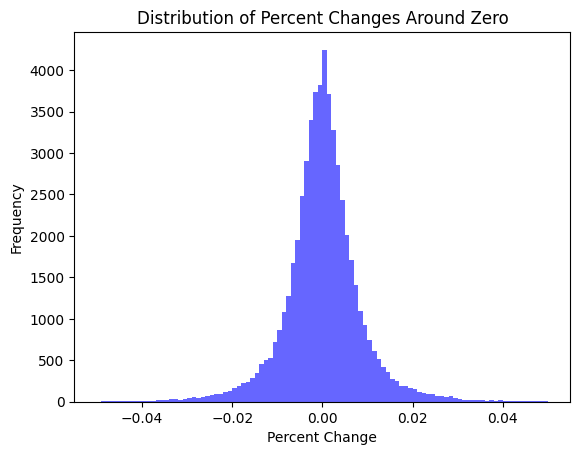

In [5]:
import duckdb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

import pandas as pd
import duckdb

# Connect to the database
con = duckdb.connect(r"C:\Users\rybot\OneDrive\Databases\datadump.duckdb")

# Query to fetch close prices at 9:00 and 9:05 for each ticker
query = f'''
    SELECT STRFTIME('%Y-%m-%d', Datetime) AS Date, Stock, STRFTIME('%H:%M:%S', Datetime) AS Time, close
    FROM Stocks
    WHERE (STRFTIME('%H:%M:%S', Datetime) = '09:30:00' OR STRFTIME('%H:%M:%S', Datetime) = '10:15:00') 
    AND Interval = 1
'''

# Fetch the data
df = con.execute(query).fetchdf()

# Pivot the data to have closing prices for each time in separate columns
df_pivot = df.pivot_table(index=['Date', 'Stock'], columns='Time', values='close').reset_index()
df_pivot.columns = ['Date', 'Ticker', 'Close_09_00', 'Close_09_05']

# Calculate the difference and percent change
df_pivot['Difference'] = df_pivot['Close_09_05'] - df_pivot['Close_09_00']
df_pivot['Change'] = df_pivot['Difference'] / df_pivot['Close_09_00']

# Display descriptive statistics
print(df_pivot.describe())

plt.hist(df_pivot['Change'].dropna(), bins=100, range=(-0.05, 0.05), alpha=0.6, color='b')
plt.title('Distribution of Percent Changes Around Zero')
plt.xlabel('Percent Change')
plt.ylabel('Frequency')
plt.show()


df = df_pivot

       Close_09_30   Close_09_35   Close_04_30   Difference       Change  \
count  6034.000000  58268.000000  58242.000000  6033.000000  6033.000000   
mean    184.048416     98.479385     98.563423     0.011910    -0.000024   
std     153.230682     98.681831     98.711662     1.881814     0.010292   
min       3.089000      1.642500      1.642500   -23.864502    -0.085031   
25%      76.452248     29.736874     29.777626    -0.458496    -0.003749   
50%     149.307999     63.944248     64.015999     0.016001     0.000158   
75%     235.808746    136.308258    136.544769     0.509499     0.003966   
max    1135.800049   1144.302490   1142.169922    22.266510     0.126218   

           Control  
count  6034.000000  
mean      0.000145  
std       0.015066  
min      -0.108198  
25%      -0.005900  
50%       0.000051  
75%       0.005913  
max       0.165352  


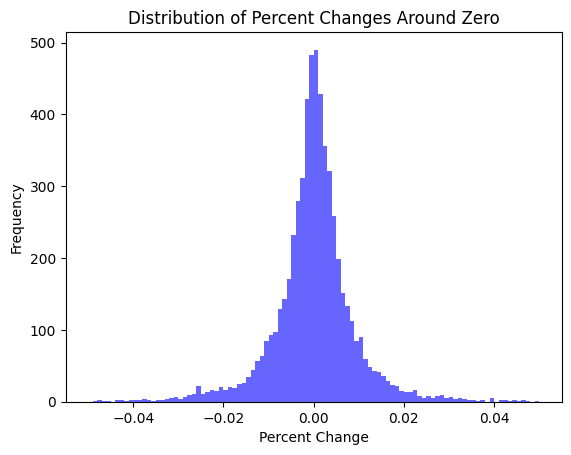

In [11]:
import duckdb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

import pandas as pd
import duckdb

# Connect to the database
con = duckdb.connect(r"C:\Users\rybot\OneDrive\Databases\datadump.duckdb")

# Query to fetch close prices at 9:00 and 9:05 for each ticker
query = f'''
    SELECT STRFTIME('%Y-%m-%d', Datetime) AS Date, Stock, STRFTIME('%H:%M:%S', Datetime) AS Time, close
    FROM Stocks
    WHERE STRFTIME('%H:%M:%S', Datetime) = '09:30:00'
    OR STRFTIME('%H:%M:%S', Datetime) = '10:30:00'
    OR STRFTIME('%H:%M:%S', Datetime) = '04:30:00'
    AND Interval = 1
'''

# Fetch the data
df = con.execute(query).fetchdf()

# Pivot the data to have closing prices for each time in separate columns
df_pivot = df.pivot_table(index=['Date', 'Stock'], columns='Time', values='close').reset_index()
df_pivot.columns = ['Date', 'Ticker', 'Close_09_30', 'Close_09_35','Close_04_30']

# Calculate the difference and percent change
df_pivot['Difference'] = df_pivot['Close_09_35'] - df_pivot['Close_09_30']
df_pivot['Change'] = df_pivot['Difference'] / df_pivot['Close_09_30']
df_pivot['Control'] = (df_pivot['Close_04_30'] - df_pivot['Close_09_30']) / df_pivot['Close_09_30']

# Display descriptive statistics
print(df_pivot.describe())

plt.hist(df_pivot['Change'].dropna(), bins=100, range=(-0.05, 0.05), alpha=0.6, color='b')
plt.title('Distribution of Percent Changes Around Zero')
plt.xlabel('Percent Change')
plt.ylabel('Frequency')
plt.show()


df = df_pivot

        Close_09_00   Close_09_05    Difference        Change
count  57622.000000  56872.000000  56345.000000  56345.000000
mean      97.397118     97.919746      0.010680      0.000169
std       97.511765     97.778961      1.653809      0.012181
min        1.645000      1.650000    -51.779968     -0.129851
25%       29.541500     29.935751     -0.281000     -0.005343
50%       63.514000     63.942501      0.005001      0.000144
75%      135.422760    136.209747      0.309999      0.005660
max     1145.400024   1142.160034     33.822998      0.143280


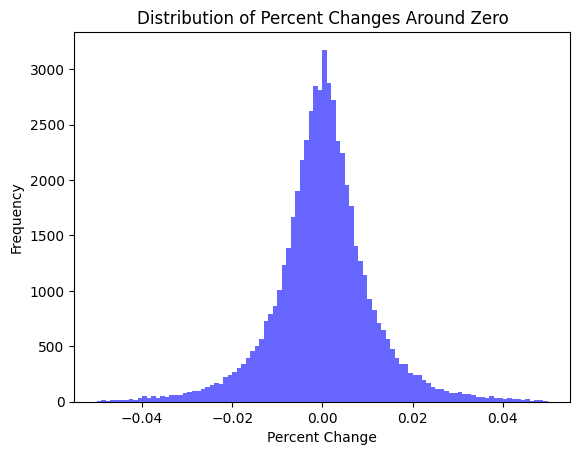

In [87]:
import duckdb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

import pandas as pd
import duckdb

# Connect to the database
con = duckdb.connect(r"C:\Users\rybot\OneDrive\Databases\datadump.duckdb")

# Query to fetch close prices at 9:00 and 9:05 for each ticker
query = f'''
    SELECT STRFTIME('%Y-%m-%d', Datetime) AS Date, Stock, STRFTIME('%H:%M:%S', Datetime) AS Time, close
    FROM Stocks
    WHERE (STRFTIME('%H:%M:%S', Datetime) = '09:30:00' OR STRFTIME('%H:%M:%S', Datetime) = '12:30:00') 
    AND Interval = 1
'''

# Fetch the data
df = con.execute(query).fetchdf()

# Pivot the data to have closing prices for each time in separate columns
df_pivot = df.pivot_table(index=['Date', 'Stock'], columns='Time', values='close').reset_index()
df_pivot.columns = ['Date', 'Ticker', 'Close_09_00', 'Close_09_05']

# Calculate the difference and percent change
df_pivot['Difference'] = df_pivot['Close_09_05'] - df_pivot['Close_09_00']
df_pivot['Change'] = df_pivot['Difference'] / df_pivot['Close_09_00']

# Display descriptive statistics
print(df_pivot.describe())

plt.hist(df_pivot['Change'].dropna(), bins=100, range=(-0.05, 0.05), alpha=0.6, color='b')
plt.title('Distribution of Percent Changes Around Zero')
plt.xlabel('Percent Change')
plt.ylabel('Frequency')
plt.show()


df = df_pivot